# Introduction
- nb14 で取得した特徴量をEDA
- nb14 では、molecule ごとの特徴量を意識して作成したのでそれを確認してみる。
- 使用するデータは、14で作ったtrainデータ。1000サンプルだけもってきた。

# Import everything I nead :)

In [21]:
import pandas as pd
import numpy as np
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

In [34]:
pd.set_option('display.max_columns', 100)

# Preparation

In [35]:
path = './data_for_eda/nb14_X_sample.csv'
X = pd.read_csv(path)
X = X.drop(['Unnamed: 0'], axis=1)
X.head(3)

,molecule_atom_index_0_dist_min,molecule_atom_index_0_dist_max,molecule_atom_index_1_dist_min,molecule_atom_index_0_dist_mean,molecule_atom_index_0_dist_std,dist,molecule_atom_index_1_dist_std,molecule_atom_index_1_dist_max,molecule_atom_index_1_dist_mean,molecule_atom_index_0_dist_max_diff,molecule_atom_index_0_dist_max_div,molecule_atom_index_0_dist_std_diff,molecule_atom_index_0_dist_std_div,atom_0_couples_count,molecule_atom_index_0_dist_min_div,molecule_atom_index_1_dist_std_diff,molecule_atom_index_0_dist_mean_div,atom_1_couples_count,molecule_atom_index_0_dist_mean_diff,molecule_couples,atom_index_1,molecule_dist_mean,molecule_atom_index_1_dist_max_diff,molecule_atom_index_0_y_1_std,molecule_atom_index_1_dist_mean_diff,molecule_atom_index_1_dist_std_div,molecule_atom_index_1_dist_mean_div,molecule_atom_index_1_dist_min_diff,molecule_atom_index_1_dist_min_div,molecule_atom_index_1_dist_max_div,molecule_atom_index_0_z_1_std,y_0,molecule_type_dist_std_diff,molecule_atom_1_dist_min_diff,molecule_atom_index_0_x_1_std,molecule_dist_min,molecule_atom_index_0_dist_min_diff,molecule_atom_index_0_y_1_mean_diff,molecule_type_dist_min,molecule_atom_1_dist_min_div,atom_index_0,molecule_dist_max,molecule_atom_1_dist_std_diff,molecule_type_dist_max,molecule_atom_index_0_y_1_max_diff,molecule_type_0_dist_std_diff,molecule_type_dist_mean_diff,molecule_atom_1_dist_mean,molecule_atom_index_0_y_1_mean_div,molecule_type_dist_mean_div,type
0,1.091953,1.783157,1.091946,1.610344,0.345594,1.091953,0.000003,1.091953,1.091950,0.691204,1.632998,-0.746359,0.316492,4,1.000000,-1.09195,1.474738,4,0.518391,10,0,1.506668,0.00000,0.182278,-0.000003,0.000003,0.999997,-0.000007,0.999994,1.000000,0.727957,-0.006031,-1.091950,-0.000007,0.727907,1.091946,0.000000,0.272949,1.091946,0.999994,1,1.783158,-1.091950,1.091953,0.377947,-1.091950,-0.000003,1.091950,1.251380,0.999997,0
1,1.091953,1.783157,1.783120,1.610344,0.345594,1.783120,NaN,1.783120,1.783120,0.000037,1.000021,-1.437526,0.193814,4,0.612383,NaN,0.903105,1,-0.172776,10,2,1.506668,0.00000,0.182278,0.000000,NaN,1.000000,0.000000,1.000000,1.000000,0.727957,-0.006031,-1.783106,0.000000,0.727907,1.091946,-0.691167,-0.104998,1.783120,1.000000,1,1.783158,-1.783106,1.783158,0.000000,-1.783106,0.000027,1.783146,0.928268,1.000015,3
2,1.091953,1.783157,1.783147,1.610344,0.345594,1.783147,0.000007,1.783158,1.783153,0.000009,1.000005,-1.437553,0.193811,4,0.612374,-1.78314,0.903091,2,-0.172803,10,3,1.506668,0.00001,0.182278,0.000005,0.000004,1.000003,0.000000,1.000000,1.000006,0.727957,-0.006031,-1.783134,-0.000028,0.727907,1.091946,-0.691194,-0.088773,1.783120,0.999984,1,1.783158,-1.783134,1.783158,0.016225,-1.783134,-0.000001,1.783146,0.938673,0.999999,3


---> なんか、NaN がある...(`molecule_atom_index_1_dixt_std`)

In [36]:
_idx = X.isnull().sum(axis=0)!=0
X.isnull().sum(axis=0)[_idx]

molecule_atom_index_0_dist_std          4
molecule_atom_index_1_dist_std         72
molecule_atom_index_0_dist_std_diff     4
molecule_atom_index_0_dist_std_div      4
molecule_atom_index_1_dist_std_diff    72
molecule_atom_index_0_y_1_std           4
molecule_atom_index_1_dist_std_div     72
molecule_atom_index_0_z_1_std           4
molecule_type_dist_std_diff            25
molecule_atom_index_0_x_1_std           4
molecule_atom_1_dist_std_diff           7
molecule_type_0_dist_std_diff           7
molecule_atom_index_0_y_1_mean_div      6
dtype: int64

---> nb14処理ミスってNaNがたくさん生成されてる。14を編集しなきゃ。。  
---> NaN があっても、lightGBMは動くけど、その行が無視される。これは問題だと思われる。

- 上記の問題を解決する方法
    1. NaNにデータを補完する(0とか)
    1. その`列`つまり特徴量を削除する。


## Method 1
- NaNにデータを補完
- 今回は、stdとかが関わっているので、0で置き換える

In [37]:
X1 = X.fillna(0.0)
X1.isnull().sum(axis=0)

molecule_atom_index_0_dist_min          0
molecule_atom_index_0_dist_max          0
molecule_atom_index_1_dist_min          0
molecule_atom_index_0_dist_mean         0
molecule_atom_index_0_dist_std          0
dist                                    0
molecule_atom_index_1_dist_std          0
molecule_atom_index_1_dist_max          0
molecule_atom_index_1_dist_mean         0
molecule_atom_index_0_dist_max_diff     0
molecule_atom_index_0_dist_max_div      0
molecule_atom_index_0_dist_std_diff     0
molecule_atom_index_0_dist_std_div      0
atom_0_couples_count                    0
molecule_atom_index_0_dist_min_div      0
molecule_atom_index_1_dist_std_diff     0
molecule_atom_index_0_dist_mean_div     0
atom_1_couples_count                    0
molecule_atom_index_0_dist_mean_diff    0
molecule_couples                        0
atom_index_1                            0
molecule_dist_mean                      0
molecule_atom_index_1_dist_max_diff     0
molecule_atom_index_0_y_1_std     

---> `NaN`がなくなった！

---
**plot**

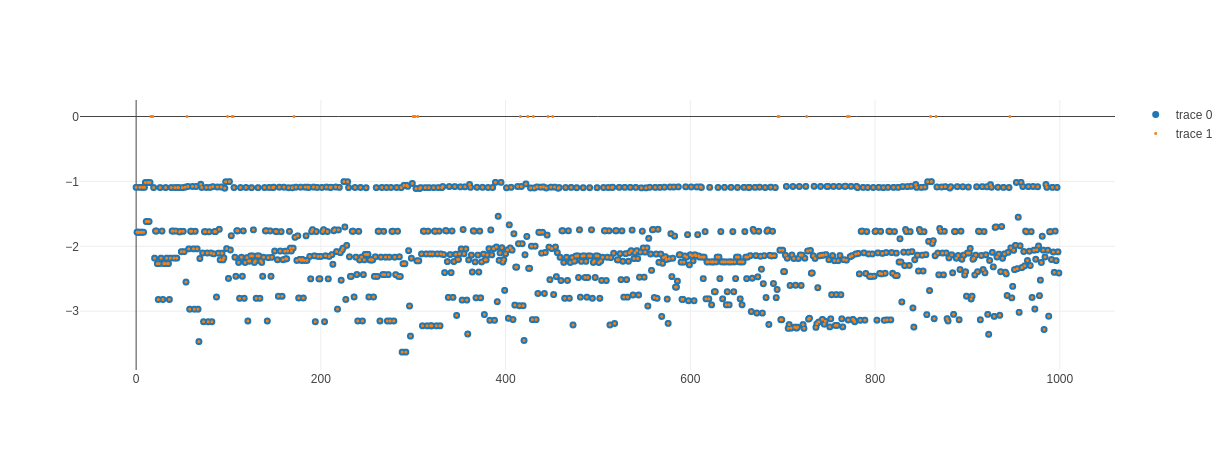

In [39]:
feat = 'molecule_type_dist_std_diff'
trace0 = go.Scatter(y=X[feat],  mode='markers', marker=dict(size=7))
trace1 = go.Scatter(y=X1[feat], mode='markers', marker=dict(size=3))
data = [trace0, trace1]
iplot(data)

## Method2

In [47]:
_idx = X.isnull().sum(axis=0)!=0
feat_null_list = X.isnull().sum(axis=0)[_idx].index

In [49]:
feat_null_list

Index(['molecule_atom_index_0_dist_std', 'molecule_atom_index_1_dist_std',
       'molecule_atom_index_0_dist_std_diff',
       'molecule_atom_index_0_dist_std_div',
       'molecule_atom_index_1_dist_std_diff', 'molecule_atom_index_0_y_1_std',
       'molecule_atom_index_1_dist_std_div', 'molecule_atom_index_0_z_1_std',
       'molecule_type_dist_std_diff', 'molecule_atom_index_0_x_1_std',
       'molecule_atom_1_dist_std_diff', 'molecule_type_0_dist_std_diff',
       'molecule_atom_index_0_y_1_mean_div'],
      dtype='object')

In [56]:
print('削除前', X.shape)

削除前 (1000, 51)


In [57]:
X_except_null_feat = X.drop(feat_null_list, axis=1)
print('削除後', X_except_null_feat.shape)

削除後 (1000, 38)


In [59]:
X_except_null_feat.isnull().sum(axis=0)

molecule_atom_index_0_dist_min          0
molecule_atom_index_0_dist_max          0
molecule_atom_index_1_dist_min          0
molecule_atom_index_0_dist_mean         0
dist                                    0
molecule_atom_index_1_dist_max          0
molecule_atom_index_1_dist_mean         0
molecule_atom_index_0_dist_max_diff     0
molecule_atom_index_0_dist_max_div      0
atom_0_couples_count                    0
molecule_atom_index_0_dist_min_div      0
molecule_atom_index_0_dist_mean_div     0
atom_1_couples_count                    0
molecule_atom_index_0_dist_mean_diff    0
molecule_couples                        0
atom_index_1                            0
molecule_dist_mean                      0
molecule_atom_index_1_dist_max_diff     0
molecule_atom_index_1_dist_mean_diff    0
molecule_atom_index_1_dist_mean_div     0
molecule_atom_index_1_dist_min_diff     0
molecule_atom_index_1_dist_min_div      0
molecule_atom_index_1_dist_max_div      0
y_0                               